In [1]:
import numpy as np
import pandas as pd

import matplotlib
import matplotlib.pyplot as plt
from matplotlib.colors import rgb2hex
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import colors as mcolors
%matplotlib inline
import seaborn as sns
sns.set_style("white")

import webcolors
from colorharmonies import Color, complementaryColor, triadicColor, splitComplementaryColor, tetradicColor, analogousColor, monochromaticColor
import cv2 

from sklearn.cluster import KMeans
from sklearn.metrics import balanced_accuracy_score

## The chosen interior photo

In [2]:
def show_photo(name:str):
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    plt.figure(figsize=(8,8))
    plt.axis('off')
    plt.imshow(interior_photo)

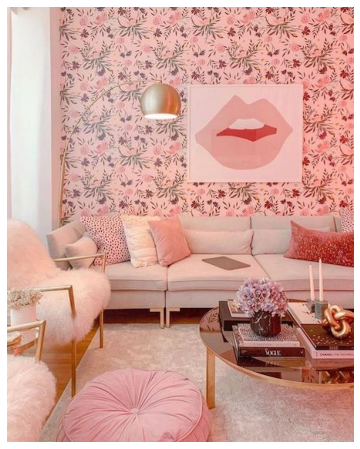

In [7]:
show_photo("photo1")

## Dominant colors shown in the photo

In [3]:
def clusters_photo(name:str, K=4):
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    
    pixels = interior_photo.reshape((-1,3))

    pixels = np.float32(pixels)

    criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    ret,label,center=cv2.kmeans(pixels,K,None,criteria,10,cv2.KMEANS_RANDOM_CENTERS)

    center = np.uint8(center)
    res = center[label.flatten()]
    res = res.reshape((interior_photo.shape))
    
    plt.figure(figsize=(8,8))
    plt.axis('off')
    
    plt.imshow(res)
    plt.show()

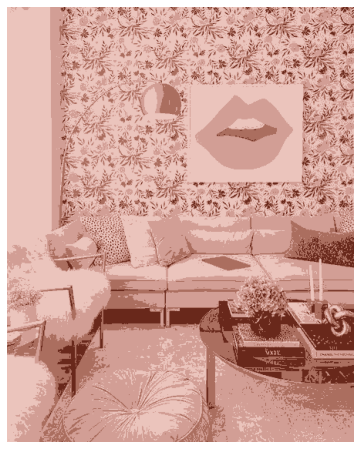

In [8]:
clusters_photo("photo1")

### import color names CSV

In [4]:
def closest_colour2(requested_colour): 
    min_colours = {}
    for key, name in hex_dict.items(): 
        r, g, b = webcolors.hex_to_rgb(key) 
        red = (r - requested_colour[0]) ** 2 
        green = (g - requested_colour[1]) ** 2
        blue = (b - requested_colour[2]) ** 2
        min_colours[(red + green + blue)] = name 
    return min_colours[min(min_colours.keys())] 

def get_colour_name2(requested_colour):
    rgb_to_hex = webcolors.rgb_to_hex(requested_colour)
    try:
        closest_name = actual_name = hex_dict[rgb_to_hex] 
    except KeyError:
        closest_name = closest_colour2(requested_colour) 
        actual_name = None
    return closest_name

## Dominant colors including color names

In [5]:
df = pd.read_csv("data/wikipedia_color_names.csv")
df_RGB = df[["name", "red", "green", "blue"]]
df_hex = df[["name", "hex"]]
hex_dict = dict(zip(df_hex["hex"], df_hex["name"]))

def plot_dominant_colors(name):
    
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    interior_photo_df = pd.DataFrame(data=interior_photo.reshape(-1,3), columns=["Red", "Green", "Blue"])
    
    cluster_photo = KMeans(n_clusters = 4) 
    cluster_photo.fit(interior_photo_df)
    
    centroids = [tuple(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)]

    interior_photo_df = interior_photo_df.assign(Clusters = cluster_photo.labels_)
    
    percentage = list(interior_photo_df["Clusters"].value_counts().sort_index()/interior_photo_df["Clusters"].count())
    interior_df = pd.DataFrame(columns = ["cluster", "centroid", "percent", "name"])
    interior_df["cluster"] = [0, 1, 2, 3]
    interior_df["centroid"] = centroids
    interior_df["percent"] = percentage
    
    centroids_array = np.asarray([np.asarray(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)]) 

    get_df = {"rgb":[], "name":[]}
    
    for i in centroids_array:
        get_df["rgb"].append(tuple(i))
        get_df["name"].append(get_colour_name2(i))
    
    interior_df["name"] = get_df["name"]
    
    labels = interior_df["name"]
    plt.pie(interior_df["percent"],colors=np.array(centroids_array/255),labels=labels)
    plt.figure(figsize=(10,10))
    plt.show()

    '''
    get_compl_df = {"rgb_compl":[], "name_compl":[]}

    for i in centroids_array:
        compl_rgb = Color(i,"","")
        get_compl_df["rgb_compl"].append(complementaryColor(compl_rgb))
        get_compl_df["name_compl"].append(get_colour_name2(complementaryColor(compl_rgb)))
    
    interior_df["centroid_compl"] = get_compl_df["rgb_compl"]
    interior_df["name_compl"] = get_compl_df["name_compl"]
    centroids_compl_array = np.asarray([np.asarray(i) for i in get_compl_df["rgb_compl"]])
    labels = interior_df["name_compl"]
    plt.pie(interior_df["percent"],colors=np.array(centroids_compl_array/255),labels=labels)
    plt.figure(figsize=(10,10))
    plt.show()
    '''

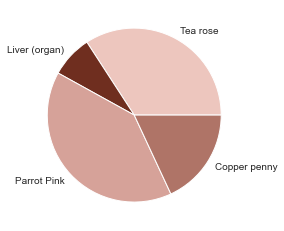

<Figure size 720x720 with 0 Axes>

In [9]:
plot_dominant_colors("photo1")

## Complementary colors including color names

In [6]:
df = pd.read_csv("data/wikipedia_color_names.csv")
df_RGB = df[["name", "red", "green", "blue"]]
df_hex = df[["name", "hex"]]
hex_dict = dict(zip(df_hex["hex"], df_hex["name"]))

def plot_complementary_colors(name):
    
    interior_photo = cv2.imread(f"images/{name}.jpg")
    interior_photo = cv2.cvtColor(interior_photo, cv2.COLOR_BGR2RGB)
    interior_photo_df = pd.DataFrame(data=interior_photo.reshape(-1,3), columns=["Red", "Green", "Blue"])
    
    cluster_photo = KMeans(n_clusters = 4) 
    cluster_photo.fit(interior_photo_df)
    
    centroids = [tuple(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)]

    interior_photo_df = interior_photo_df.assign(Clusters = cluster_photo.labels_)
    
    percentage = list(interior_photo_df["Clusters"].value_counts().sort_index()/interior_photo_df["Clusters"].count())
    interior_df = pd.DataFrame(columns = ["cluster", "centroid", "percent", "name"])
    interior_df["cluster"] = [0, 1, 2, 3]
    interior_df["centroid"] = centroids
    interior_df["percent"] = percentage
    
    centroids_array = np.asarray([np.asarray(i) for i in np.round(cluster_photo.cluster_centers_).astype(int)]) 

    '''
    get_df = {"rgb":[], "name":[]}
    
    for i in centroids_array:
        get_df["rgb"].append(tuple(i))
        get_df["name"].append(get_colour_name2(i))
    
    interior_df["name"] = get_df["name"]
    
    labels = interior_df["name"]
    plt.pie(interior_df["percent"],colors=np.array(centroids_array/255),labels=labels)
    plt.figure(figsize=(10,10))
    #plt.show()
    '''

    get_compl_df = {"rgb_compl":[], "name_compl":[]}

    for i in centroids_array:
        compl_rgb = Color(i,"","")
        get_compl_df["rgb_compl"].append(complementaryColor(compl_rgb))
        get_compl_df["name_compl"].append(get_colour_name2(complementaryColor(compl_rgb)))
    
    interior_df["centroid_compl"] = get_compl_df["rgb_compl"]
    interior_df["name_compl"] = get_compl_df["name_compl"]
    centroids_compl_array = np.asarray([np.asarray(i) for i in get_compl_df["rgb_compl"]])
    labels = interior_df["name_compl"]
    plt.pie(interior_df["percent"],colors=np.array(centroids_compl_array/255),labels=labels)
    plt.figure(figsize=(10,10))
    plt.show()

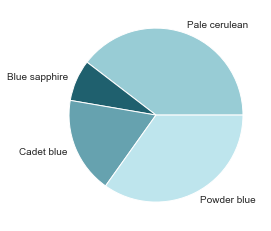

<Figure size 720x720 with 0 Axes>

In [10]:
plot_complementary_colors("photo1")